<a href="https://colab.research.google.com/github/shivamsouravjha/Lane-Detector/blob/master/Find_Lanes_of_roads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

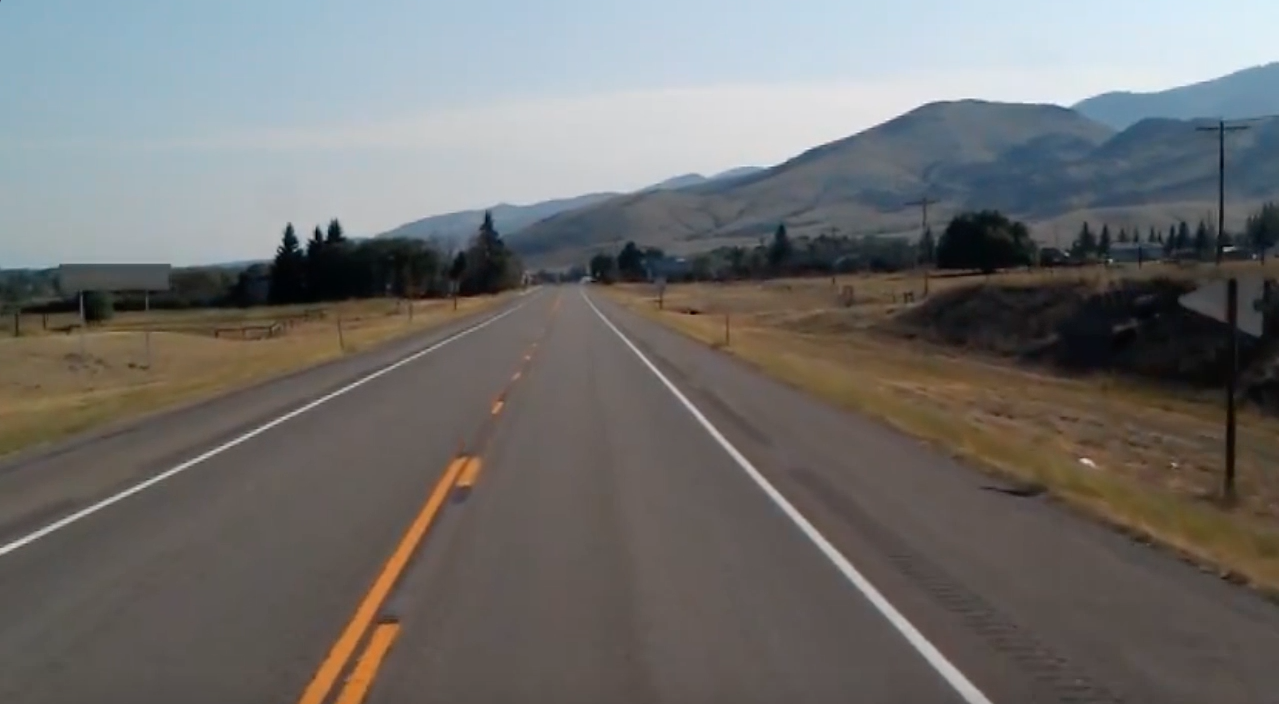

In [219]:
import cv2 

import numpy as np 
import matplotlib.pyplot as plt 
  
img = cv2.imread('/content/drive/My Drive/test_image.jpg') 

from google.colab.patches import cv2_imshow
cv2.waitKey(0) 
 
cv2_imshow(img)

def canny(image):
  image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)                #to convert image into gray scale
  bilateral = cv2.GaussianBlur(image, (5, 5), 0)            #adding gaussian blur to remove noise
  canny = cv2.Canny(bilateral,50,150)       #apply canny
  return canny

def region_of_interest(image): 
  h = image.shape[0]                           #depth of the triangle
  polygons = np.array([[(250,h),(1100,h),(550,250)]])                 #making the triangle
  mask = np.zeros_like(image)               #making a zero mask of image shape
  cv2.fillPoly(mask,polygons,255)            #apply poly on blank screen
  masked = cv2.bitwise_and(mask,image)               #and of mask & image to detect road 
  return masked        #return the masked


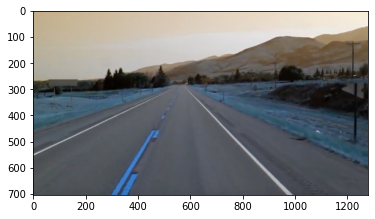

In [220]:
plt.imshow(img)

In [221]:
def display(image,lines):
  line_image= np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2 = line.reshape(4)
      cv2.line(line_image,(x1,y1),(x2,y2),(255,255,0),10)
  return line_image


In [222]:
def coordinate(image,parameters):
  slope,intercept=parameters
  y1 = image.shape[0]
  y2 = int(y1*(3/5))
  x1= int((y1-intercept)/slope)
  
  x2= int((y2-intercept)/slope)
  return np.array([x1,y1,x2,y2])
def average_slope(image,lines):
  left=[]
  right=[]
  if lines is not None:

   for line in lines:
     x1,y1,x2,y2=line.reshape(4)
     parameter = np.polyfit((x1,x2),(y1,y2),1)
     slope=parameter[0]
     intercept =parameter[1]
     if slope<0:
       left.append((slope,intercept))
     else:
      right.append((slope,intercept))
  left_average=np.average(left,axis=0)

  right_average=np.average(right,axis=0)
  left_line = coordinate(image,left_average)
  right_line = coordinate(image,right_average)
  return np.array([left_line,right_line])

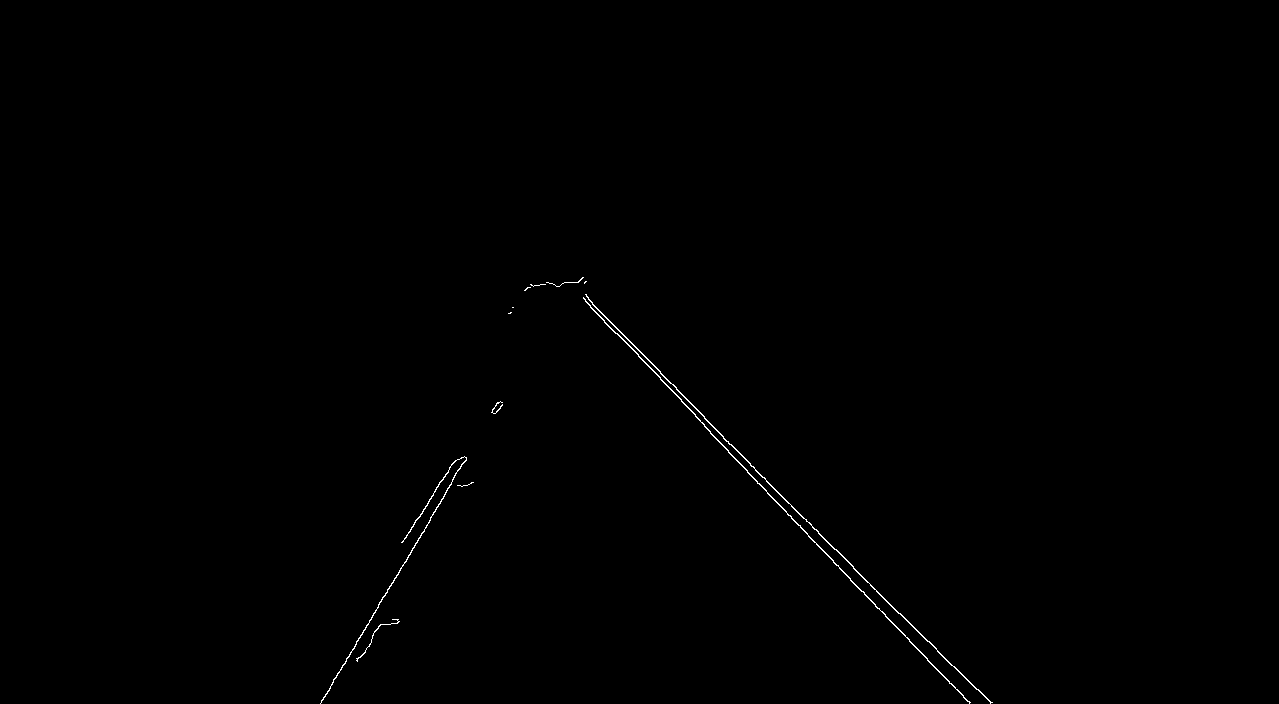

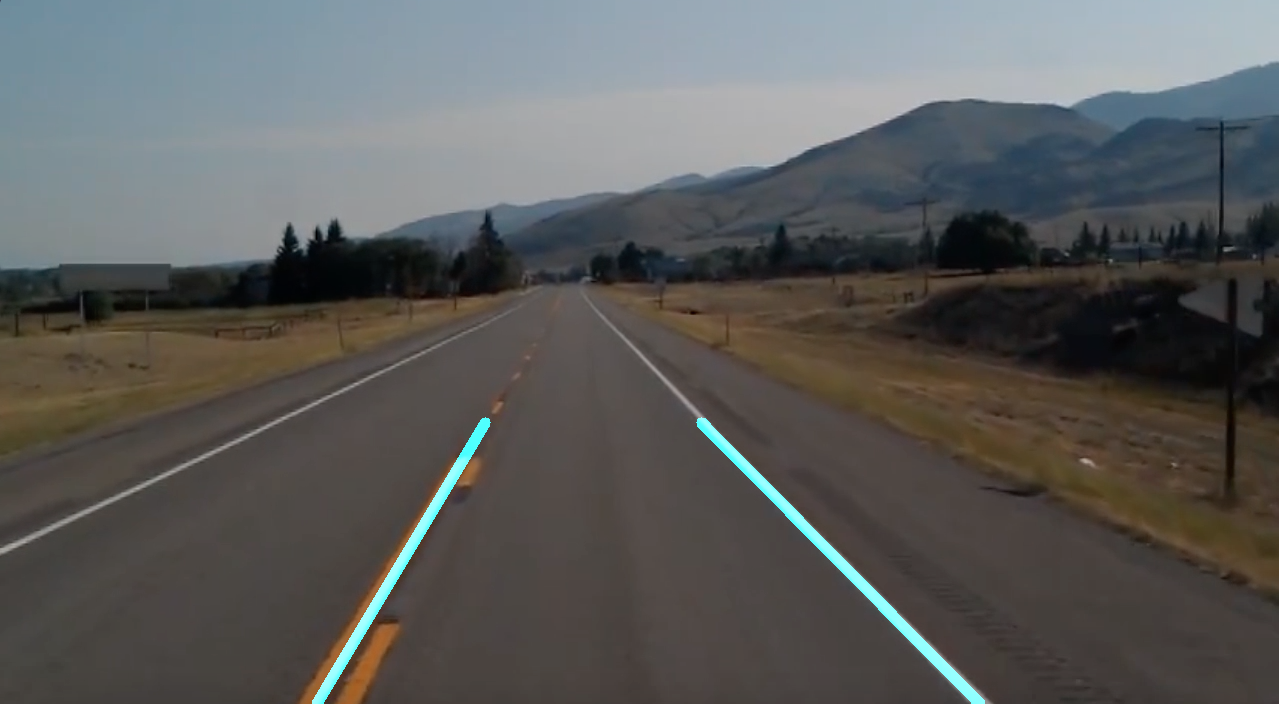

In [223]:
canny1 = canny(img)
canny2 = region_of_interest(canny1)
lines = cv2.HoughLinesP(canny2,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
cv2_imshow(canny2)
average = average_slope(img,lines)

lines = display(img,average)
combo = cv2.addWeighted(img,0.8,lines,1,1)

cv2_imshow(combo)